In [130]:
import numpy as np
import pandas as pd

In [131]:
books = pd.read_csv('BX-Books.csv', header=None, sep='\n',encoding = "ISO-8859-1")
books = books[0].str.split(';', expand=True)
new_header = books.iloc[0] #grab the first row for the header
books = books[1:] #take the data less the header row
books.columns = new_header
books = books.iloc[:, :4]
books.head()

,ISBN,"""Book-Title""","""Book-Author""","""Year-Of-Publication"""
1,0195153448,"""Classical Mythology""","""Mark P. O. Morford""","""2002"""
2,0002005018,"""Clara Callan""","""Richard Bruce Wright""","""2001"""
3,0060973129,"""Decision in Normandy""","""Carlo D'Este""","""1991"""
4,0374157065,"""Flu: The Story of the Great Influenza Pandemi...","""Gina Bari Kolata""","""1999"""
5,0393045218,"""The Mummies of Urumchi""","""E. J. W. Barber""","""1999"""


In [132]:
new_headers = []

for header in books.iloc[:, 1:4].columns: # data.columns is your list of headers
    header = header.strip('"') # Remove the quotes off each header
    new_headers.append(header) # Save the new strings without the quotes

books.columns = [*['ISBN'], *new_headers] # Replace the old headers with the new list


In [133]:
books.head()




,ISBN,Book-Title,Book-Author,Year-Of-Publication
1,0195153448,"""Classical Mythology""","""Mark P. O. Morford""","""2002"""
2,0002005018,"""Clara Callan""","""Richard Bruce Wright""","""2001"""
3,0060973129,"""Decision in Normandy""","""Carlo D'Este""","""1991"""
4,0374157065,"""Flu: The Story of the Great Influenza Pandemi...","""Gina Bari Kolata""","""1999"""
5,0393045218,"""The Mummies of Urumchi""","""E. J. W. Barber""","""1999"""


In [134]:
books['ISBN'].nunique()


271379

In [135]:

ratings = pd.read_csv('BX-Book-Ratings.csv',header=None, sep='\n',encoding = "ISO-8859-1")
ratings = ratings[0].str.split(';', expand=True)
new_header = ratings.iloc[0] #grab the first row for the header
ratings = ratings[1:] #take the data less the header row
ratings.columns = new_header
#ratings = books.iloc[:, :4]

ratings.head()

,User-ID,"""ISBN""","""Book-Rating"""
1,276725,"""034545104X""","""0"""
2,276726,"""0155061224""","""5"""
3,276727,"""0446520802""","""0"""
4,276729,"""052165615X""","""3"""
5,276729,"""0521795028""","""6"""


In [136]:
new_headers = []

for header in ratings.columns: # data.columns is your list of headers
    header = header.strip('"') # Remove the quotes off each header
    new_headers.append(header) # Save the new strings without the quotes

ratings.columns = new_headers # Replace the old headers with the new list

In [137]:
ratings.head()

,User-ID,ISBN,Book-Rating
1,276725,"""034545104X""","""0"""
2,276726,"""0155061224""","""5"""
3,276727,"""0446520802""","""0"""
4,276729,"""052165615X""","""3"""
5,276729,"""0521795028""","""6"""


In [138]:
ratings['ISBN'].nunique()



340556

In [139]:
ratings = ratings.applymap(lambda x: x.replace('"', ''))
books = books.applymap(lambda x: x.replace('"', ''))

In [140]:
ratings.head()

,User-ID,ISBN,Book-Rating
1,276725,034545104X,0
2,276726,0155061224,5
3,276727,0446520802,0
4,276729,052165615X,3
5,276729,0521795028,6


In [141]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication
1,0195153448,Classical Mythology,Mark P. O. Morford,2002
2,0002005018,Clara Callan,Richard Bruce Wright,2001
3,0060973129,Decision in Normandy,Carlo D'Este,1991
4,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999
5,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999


In [142]:
df = pd.merge(books, ratings, on='ISBN', how='right')


In [143]:
df = df.dropna(subset=["Book-Rating"])
#df.dropna(subset=['Col2'])
df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,User-ID,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,2,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,8,5
2,0002005018,Clara Callan,Richard Bruce Wright,2001,11400,0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,11676,8
4,0002005018,Clara Callan,Richard Bruce Wright,2001,41385,0


In [144]:
customers = df['User-ID'].value_counts()
products = df['ISBN'].value_counts()

quantiles = [0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.25,0.5,0.75,0.9,0.95,0.96,0.97,0.98,0.99,1]

print('costomers\n', customers.quantile(quantiles))
print('products\n', products.quantile(quantiles))

costomers
 0.00        1.0
0.01        1.0
0.02        1.0
0.03        1.0
0.04        1.0
0.05        1.0
0.10        1.0
0.25        1.0
0.50        1.0
0.75        4.0
0.90       12.0
0.95       29.0
0.96       39.0
0.97       55.0
0.98       85.0
0.99      174.0
1.00    13602.0
Name: User-ID, dtype: float64
products
 0.00       1.0
0.01       1.0
0.02       1.0
0.03       1.0
0.04       1.0
0.05       1.0
0.10       1.0
0.25       1.0
0.50       1.0
0.75       2.0
0.90       6.0
0.95      10.0
0.96      12.0
0.97      15.0
0.98      21.0
0.99      36.0
1.00    2502.0
Name: ISBN, dtype: float64


In [145]:
customers = customers[customers >= 12]
products = products[products>=10]

#pd.DataFrame({'customer_id': customers.index})
products_gte_10 = pd.DataFrame({'ISBN': products.index})
customers_gte_12 = pd.DataFrame({'User-ID': customers.index})
#customers

#df[products['ISBN'] >= 12]

s1 = pd.merge(df, products_gte_10, how='inner', on=['ISBN'])
reduced_df = pd.merge(s1, customers_gte_12, how='inner', on=['User-ID'])
reduced_df

,ISBN,Book-Title,Book-Author,Year-Of-Publication,User-ID,Book-Rating
0,0002005018,Clara Callan,Richard Bruce Wright,2001,8,5
1,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,8,0
2,0399135782,The Kitchen God's Wife,Amy Tan,1991,8,0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,11400,0
4,0786868716,The Five People You Meet in Heaven,Mitch Albom,2003,11400,9
...,...,...,...,...,...,...
433079,0099106507,NaN,NaN,NaN,20857,7
433080,4453099966,NaN,NaN,NaN,20857,0
433081,084231816X,NaN,NaN,NaN,140826,0
433082,8878193526,NaN,NaN,NaN,262659,10


In [146]:
ratings.shape

(1149780, 3)

In [147]:
books.shape

(271379, 4)

In [148]:
new_headers = []

for header in df.columns: # data.columns is your list of headers
    header = header.strip('"') # Remove the quotes off each header
    new_headers.append(header) # Save the new strings without the quotes

df.columns = new_headers # Replace the old headers with the new list

In [149]:
df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,User-ID,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,2,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,8,5
2,0002005018,Clara Callan,Richard Bruce Wright,2001,11400,0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,11676,8
4,0002005018,Clara Callan,Richard Bruce Wright,2001,41385,0


# EDA

Let's explore the data a bit and get a look at some of the best rated movies.

## Visualization Imports

In [150]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [162]:
type(reduced_df['Book-Rating'][1])
reduced_df['Book-Rating'] = reduced_df['Book-Rating'].astype(int)
type(reduced_df['Book-Rating'][1])

numpy.int64

In [163]:
reduced_df.groupby('Book-Title')['Book-Rating'].mean().sort_values(ascending=False).head()

Book-Title
Das Zweite GedÃ?Â¤chtnis.                              9.50
The Blue Day Book: A Lesson in Cheering Yourself Up    9.25
The Big Rumpus: A Mother's Tale from the Trenches      9.00
Harry Potter Und Der Feuerkelch                        8.60
La Fata Carabina                                       8.50
Name: Book-Rating, dtype: float64

In [164]:
reduced_df.groupby('Book-Title')['Book-Rating'].count().sort_values(ascending=False).head()

Book-Title
Wild Animus                   1357
The Lovely Bones: A Novel      832
The Da Vinci Code              610
Bridget Jones's Diary          595
The Nanny Diaries: A Novel     578
Name: Book-Rating, dtype: int64

In [165]:
avg_ratings = pd.DataFrame(df.groupby('Book-Title')['Book-Rating'].mean())
avg_ratings.head()

,Book-Rating
Book-Title,
"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",NaN
Always Have Popsicles,NaN
Apple Magic (The Collector's series),NaN
"Ask Lily (Young Women of Faith: Lily Series, Book 5)",NaN
Beyond IBM: Leadership Marketing and Finance for the 1990s,8.0


In [166]:
avg_ratings['num of ratings'] = pd.DataFrame(reduced_df.groupby('Book-Title')['Book-Rating'].count())
avg_ratings.head()

,Book-Rating,num of ratings
Book-Title,,
"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",NaN,NaN
Always Have Popsicles,NaN,NaN
Apple Magic (The Collector's series),NaN,NaN
"Ask Lily (Young Women of Faith: Lily Series, Book 5)",NaN,NaN
Beyond IBM: Leadership Marketing and Finance for the 1990s,8.0,NaN


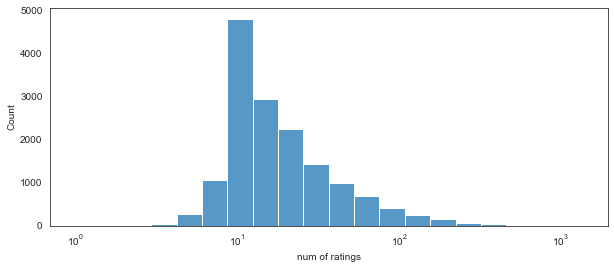

In [167]:
#We can see a log-normal distirbution below
#This is common with ecommerce according to following time-stamped video: https://youtu.be/CF0l5zw4t9s?t=335
plt.figure(figsize=(10,4))
sns.histplot(data=avg_ratings, x="num of ratings", bins=20, log_scale=True)


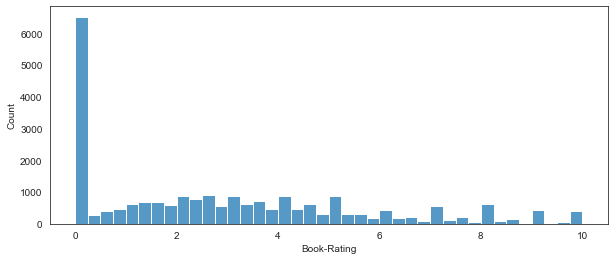

In [168]:
plt.figure(figsize=(10,4))


sns.histplot(data=avg_ratings, x="Book-Rating", bins=40)

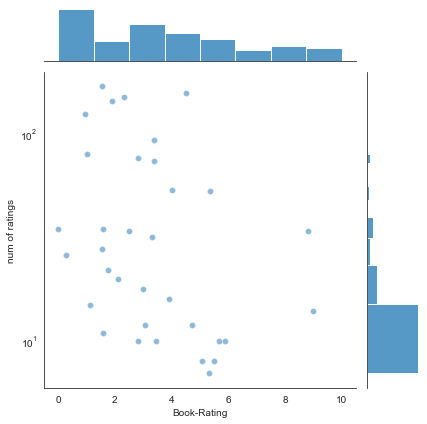

In [169]:
avg_ratings_sample = avg_ratings.sample(1000)
g = sns.jointplot(x='Book-Rating',y='num of ratings',data=avg_ratings_sample,alpha=0.5)
g.ax_joint.set_yscale('log')

In [170]:
df.shape

(1149780, 6)

In [171]:
bookmat = reduced_df.pivot_table(index='User-ID',columns=['Book-Title'],values='Book-Rating')
bookmat.head()

Book-Title,"Earth Prayers From around the World: 365 Prayers, Poems, and Invocations for Honoring the Earth","Good Wives: Image and Reality in the Lives of Women in Northern New England, 1650-1750",Murder of a Sleeping Beauty (Scumble River Mysteries (Paperback)),"Q-Space (Star Trek The Next Generation, Book 47)","Q-Zone (Star Trek The Next Generation, Book 48)",!Yo!,'Salem's Lot,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,01-01-00: The Novel of the Millennium,...,\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character",\The Happy Prince\ and Other Stories (Penguin Popular Classics),\What Do You Care What Other People Think?\: Further Adventures of a Curious Character,e,iI Paradiso Degli Orchi,murder@maggody.com : An Arly Hanks Mystery (Arly Hanks Mysteries (Paperback)),one hundred years of solitude,stardust,why I'm like this : True Stories
User-ID,,,,,,,,,,,,,,,,,,,,,
100004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100053,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100066,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [172]:
avg_ratings.sort_values('num of ratings',ascending=False).head(10)

,Book-Rating,num of ratings
Book-Title,,
Wild Animus,4.829337,1357.0
The Lovely Bones: A Novel,1.518919,832.0
The Da Vinci Code,2.091319,610.0
Bridget Jones's Diary,2.822660,595.0
The Nanny Diaries: A Novel,3.038647,578.0
The Secret Life of Bees,1.585492,552.0
A Painted House,1.552347,543.0
Divine Secrets of the Ya-Ya Sisterhood: A Novel,2.647541,514.0
Angels &amp,0.747788,495.0


In [173]:
avg_ratings.sort_values(['num of ratings','Book-Rating'],ascending=False).head(10)

#should I round these

,Book-Rating,num of ratings
Book-Title,,
Wild Animus,4.829337,1357.0
The Lovely Bones: A Novel,1.518919,832.0
The Da Vinci Code,2.091319,610.0
Bridget Jones's Diary,2.822660,595.0
The Nanny Diaries: A Novel,3.038647,578.0
The Secret Life of Bees,1.585492,552.0
A Painted House,1.552347,543.0
Divine Secrets of the Ya-Ya Sisterhood: A Novel,2.647541,514.0
Angels &amp,0.747788,495.0


In [174]:
Da_Vinci_Code = bookmat['The Da Vinci Code']
Life_of_Pi= bookmat['Life of Pi']
bjd = bookmat['Bridget Jones\'s Diary']

In [83]:
Da_Vinci_Code

User-ID
100004    NaN
100009    8.0
10001     NaN
100053    NaN
100066    NaN
         ... 
99738     NaN
9974      NaN
99946     NaN
99955     NaN
99996     NaN
Name: The Da Vinci Code, Length: 10868, dtype: float64

In [87]:
similar_to_dvc = bookmat.corrwith(Da_Vinci_Code)

In [88]:
corr_dvc = pd.DataFrame(similar_to_dvc, columns=['Correlation'])
corr_dvc.dropna(inplace=True)

In [89]:
corr_dvc.sort_values('Correlation', ascending=False).head(10)

,Correlation
Book-Title,
"People of the Lightning (The First North Americans series, Book 7)",1.0
Jupiter's Bones: A Novel (Peter Decker &amp,1.0
The Kissing Game,1.0
The Jungle (The Penguin American Library),1.0
China Men (Vintage International (Paperback)),1.0
"Baby, Oh Baby! (Time of Your Life)",1.0
"Junie B. Jones and Her Big Fat Mouth (Junie B. Jones 3, paper)",1.0
Seeing a Large Cat (Amelia Peabody Mysteries (Paperback)),1.0
The Island of Lost Maps: A True Story of Cartographic Crime,1.0


In [91]:
corr_dvc = corr_dvc.join(avg_ratings['num of ratings'])
corr_dvc.head(10)

,Correlation,num of ratings
Book-Title,,
Murder of a Sleeping Beauty (Scumble River Mysteries (Paperback)),0.530864,11
'Salem's Lot,0.303845,38
...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,-0.305424,11
01-01-00: A Novel of the Millennium,1.000000,6
01-01-00: The Novel of the Millennium,0.500000,18
"1,000 Places to See Before You Die",-0.994850,14
10 Lb. Penalty,0.108465,54
1001 Ways to Be Romantic,0.404226,17
101 School Jokes,-0.565916,11


In [97]:
#filter out films with lt 100 reviews
corr_dvc[corr_dvc['num of ratings']>=100].sort_values('Correlation', ascending=False).head()

,Correlation,num of ratings
Book-Title,,
The Da Vinci Code,1.000000,610
The Woman Next Door,0.650662,108
A Walk in the Woods: Rediscovering America on the Appalachian Trail (Official Guides to the Appalachian Trail),0.650314,121
Mirror Image,0.647264,132
Sisterhood of the Traveling Pants,0.637859,108


In [98]:
similar_to_lop = bookmat.corrwith(Life_of_Pi)

/Users/diongarman/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/diongarman/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [99]:
corr_lop = pd.DataFrame(similar_to_lop, columns=['Correlation'])
corr_lop.dropna(inplace=True)

In [100]:
corr_lop.sort_values('Correlation', ascending=False).head(10)

,Correlation
Book-Title,
Sense and Sensibility (Wordsworth Classics),1.0
Captive (Florida Civil War (Paperback)),1.0
Pigs Don't Fly,1.0
Pilgrim at Tinker Creek,1.0
Candyland : A Novel In Two Parts,1.0
Playmates,1.0
Polite Lies: On Being a Woman Caught Between Cultures,1.0
Can't Stop Loving You (Zebra Romantic Suspense),1.0
"Powershift: Knowledge, Wealth, and Violence at the Edge of the 21st Century",1.0


In [102]:
corr_lop = corr_lop.join(avg_ratings['num of ratings'])
corr_lop.head(10)

,Correlation,num of ratings
Book-Title,,
Murder of a Sleeping Beauty (Scumble River Mysteries (Paperback)),0.921566,11
'Salem's Lot,0.507673,38
01-01-00: The Novel of the Millennium,1.000000,18
"14,000 Things to Be Happy About",1.000000,27
16 Lighthouse Road,0.501636,62
1984,0.263733,190
1st to Die: A Novel,0.311987,367
2001 A Space Odyssey,0.088294,10
2001: A Space Odyssey,1.000000,22


In [103]:
corr_lop[corr_lop['num of ratings']>=100].sort_values('Correlation', ascending=False).head()

,Correlation,num of ratings
Book-Title,,
Life of Pi,1.000000,492
Midnight,0.894594,100
The Woman Next Door,0.879441,108
A Darkness More Than Night,0.787241,104
Accident,0.774946,105


In [175]:
similar_to_bjd = bookmat.corrwith(bjd)

/Users/diongarman/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/diongarman/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [176]:
corr_bjd = pd.DataFrame(similar_to_bjd, columns=['Correlation'])
corr_bjd.dropna(inplace=True)

In [177]:
corr_bjd = corr_bjd.join(avg_ratings['num of ratings'])
corr_bjd.head(10)

,Correlation,num of ratings
Book-Title,,
"Earth Prayers From around the World: 365 Prayers, Poems, and Invocations for Honoring the Earth",-1.000000,8.0
'Salem's Lot,-0.500000,38.0
...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,1.000000,11.0
01-01-00: A Novel of the Millennium,1.000000,6.0
01-01-00: The Novel of the Millennium,-0.467082,18.0
10 Lb. Penalty,-0.185995,54.0
100 Selected Poems by E. E. Cummings,0.000000,9.0
101 Dalmatians,-0.430247,34.0
101 Silly Summertime Jokes,1.000000,10.0


In [178]:
corr_bjd[corr_bjd['num of ratings']>=100].sort_values('Correlation', ascending=False).head()

,Correlation,num of ratings
Book-Title,,
Bridget Jones's Diary,1.000000,595.0
A Man in Full,0.784060,126.0
Night Whispers,0.645388,100.0
The Mulberry Tree,0.619604,118.0
Angels,0.602236,121.0
